#### The goal of this notebook is to combine the output Reciever Operator Curve and Precision Recall Curve plots for 10, 100 and 1000 negative examples to 1 positive example
* The number of negative examples to one positive examples at a ratio of 10, 10^2, and 10^3 do not seem to affect the ROC and PRC

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
from data_tools import plotting as pt

/home/rogertu/projects/MechRepoNet/mrn_venv/lib/python3.8/site-packages/data_tools/df_processing.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

In [3]:
%%time
pairs0001 = pd.read_csv(os.path.join('../2_pipeline/','14b_Model_Eval_Holdout_Set_1to1','out','results.csv'))
pairs0010 = pd.read_csv(os.path.join('../2_pipeline/','14b_Model_Eval_Holdout_Set_10to1','out','results.csv'))
pairs0100 = pd.read_csv(os.path.join('../2_pipeline/','14b_Model_Eval_Holdout_Set','out','results.csv'))
pairs1000 = pd.read_csv(os.path.join('../2_pipeline/','14b_Model_Eval_Holdout_Set_1000to1','out','results.csv'))

CPU times: user 22.6 s, sys: 3.37 s, total: 26 s
Wall time: 26 s


In [4]:
zero_prob1000 = pairs1000['proba'].value_counts().index[0]
zero_prob0100 = pairs0100['proba'].value_counts().index[0]
zero_prob0010 = pairs0010['proba'].value_counts().index[0]
zero_prob0001 = pairs0001['proba'].value_counts().index[0]

In [5]:
y1 = pairs0001.query('proba !=@zero_prob0001')['status']
y10 = pairs0010.query('proba !=@zero_prob0010')['status']
y100 = pairs0100.query('proba !=@zero_prob0100')['status']
y1000 = pairs1000.query('proba !=@zero_prob1000')['status']

In [6]:
y_proba1 = pairs0001.query('proba != @zero_prob0001')['proba']
y_proba10 = pairs0010.query('proba != @zero_prob0010')['proba']
y_proba100 = pairs0100.query('proba != @zero_prob0100')['proba']
y_proba1000 = pairs1000.query('proba != @zero_prob1000')['proba']

In [7]:
# quick check to see if all sets are even
pairs0010['status'].sum()==pairs0100['status'].sum()==pairs1000['status'].sum()==pairs0001['status'].sum()

True

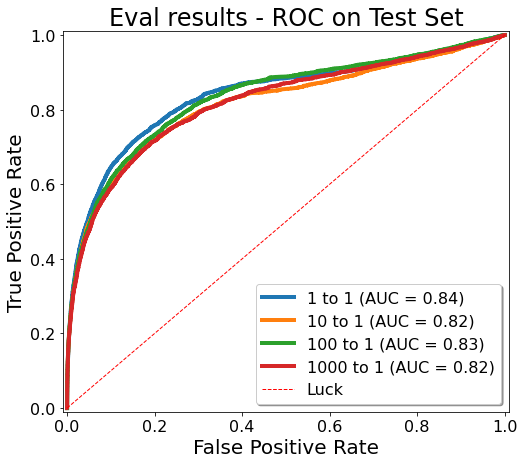

In [8]:
pt.graph_single_roc(y1, y_proba1, '1 to 1')
pt.graph_single_roc(y10, y_proba10, '10 to 1')
pt.graph_single_roc(y100, y_proba100, '100 to 1')
pt.graph_single_roc(y1000, y_proba1000, '1000 to 1')

pt.graph_roc_boilerplate('Eval results - ROC on Test Set');

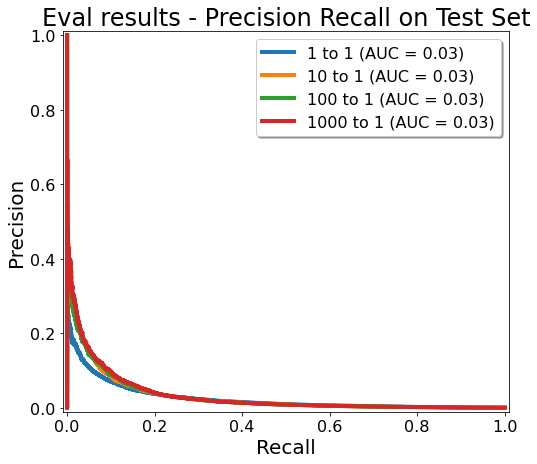

In [9]:
pt.graph_single_prc(y1, y_proba1, '1 to 1')
pt.graph_single_prc(y10, y_proba10, '10 to 1')
pt.graph_single_prc(y100, y_proba100, '100 to 1')
pt.graph_single_prc(y1000, y_proba1000, '1000 to 1')

pt.graph_prc_boilerplate('Eval results - Precision Recall on Test Set');